# Health Information Systems and Decision Support Systems
# WPO 4: - CAD Systems (20/03/2020)
***
*Panagiotis Gonidakis, Jakub Ceranka, Pieter Boonen, Jef Vandemeulebrouke*<br>
*Department of Electronics and Informatics (ETRO)*<br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Niklaus Jeff Geisser Aguilar 0554142</font> </br>

<font color=blue>Fernando Esteban Ramirez Barbosa 0562659</font> </br>

### Goal
The goal of this practical session is to get an insight into artificial neural networks and convolutional neural networks. Your tasks will involve examining and preprocessing the data, training various neural networks and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook, the image files representing the necessary graphs and the report in .ipynb and .html format. The grade from this practical session will contribute to your final grade.

You are kindly requested to submit the <b> .ipynb </b>, an exported <b>.html</b> version  with all the cells properly executed and a <b>.zip</b> file containing all the <b>images</b> displaying the tensorboard training/validating curves </b>(in case are not displayed in the .ipynb).

Please use the Canvas or Ufora assignment functionality to upload your reports.

The deadline of the submission is in <b> 09/04/2020, 23:59 pm. </b>.

If you have difficulties submitting your assignment, send it to [jceranka@etrovub.be](mailto:jceranka@etrovub.be) 

Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be)

# Libraries
During this practical session, the following libraries will be used:

* Numpy (np)
* Glob
* Simple ITK (sitk)
* Matplotlib
* Sklearn
* Tensorflow (tf)
* TFLearn / (you can also use keras)

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using **version** command. 

* If you use your own laptop, you will need to install the two new modules. Otherwise, all the necessary software is already installed at the lab's PCs. 

* These expirements are simplified in order to be run without the need of a powerful GPU. However some training tasks may take 30-40 minutes using a CPU. You can accelerate your expirements if you work on [Google colab](https://colab.research.google.com/) framework where a GPU is offered. Then you need to create a GoogleDrive account and upload all the necessary data (scripts + data). 
For more information look [here](https://colab.research.google.com/) and [here](https://colab.research.google.com/notebooks/gpu.ipynb)

### How to  install TFLearn

TFLearn requires Tensorflow to be installed. For the purpose of this excercise you are promted to install Tensorflow with <b>CPU support only</b>.

* https://www.tensorflow.org/install/ <p>
* https://www.tensorflow.org/install/install_linux  <p>
* https://www.tensorflow.org/install/install_mac  <p>
* https://www.tensorflow.org/install/install_windows  <p>

Then, install TFLearn: 
* http://tflearn.org/installation/

Generally, open the anaconda prompt and then type:
 ```pip install tensorflow``` and after ```pip install tflearn```
 
(*) Keep in mind that recently there is a new version of tensorflow. Depending on the python version you are working you might donwload tensorflow 1 or 2. For python 3.6, tensorflow 2.1.0 is by default is downloaded whereas for python 3.7, tensorflow 1.14.0. It is advised to verify which version it is being used before looking for any documentation as the APIs differ.

(*) Alternally, if you have compatability issues or your are more familiar with keras, you can install [keras](https://keras.io/#installation) which is very similar to tflearn.

# Lung Nodule Analysis 
Lung cancer is the leading cause of cancer-related deaths worldwide. Screening high risk individuals for lung cancer with low-dose CT scans is now being implemented in the United States and other countries are expected to follow soon. In CT lung cancer screening, millions of CT scans will have to be analyzed, which is an enormous burden for radiologists. Therefore, there is a lot of interest in development of computer algorithms to optimize cancer screening.

<img src="images/luna16_image.png">

A vital first step in the analysis of lung cancer CT scans is the detection of pulmonary nodules, which may or may not represent early stage lung cancer. Many Computer-Aided Detection (CAD) systems have already been proposed for this task. 

The LIDC/IDRI data set is publicly available, including the ground-truth annotations of nodules performed by four radiologists.

This practical session is inspired from the challenge [LUNA16](https://luna16.grand-challenge.org/home/), which focused on a large-scale evaluation of automatic nodule detection algorithms on the LIDC/IDRI data set.

<img src="images/lung_cancer1.png">


### Using LIDC/IDRI data set in this practical session

For the needs of this practical session, we will look for an algorithm that only determines the likelihood for a given location in a CT scan to contain a pulmonary nodule. Furthermore, we have included a very small part of the LIDC/IDRI data set and we will use only a slice of suspicious regions of a CT scan.

### Data augmentation

Originally our dataset was very unbalanced. There were a lot samples of non-nodules (negatives) but very few samples of nodules (positives). Machine learning algorithms and specifically neural networks and convolutional neural networks require to be trained on balanced dataset, meaning all the classes should be equally represented in the training set. 

Using data augmentation methods (**rotation and translation**), positive samples were massively augmented in order to balance the two classes (nodules and non-nodules)

### Ground Truth data

Categorical data are variables that contain label values rather than numeric values. In our dataset, a sample can represent a nodule or a non-nodule area, so initially we have our ground truth data in a categorical form. Many machine learning algorithms cannot operate on label data directly. They require all input variables to be numeric. This means that categorical data must be converted to a numerical form. This involves two steps:
1. Integer Encoding
2. One-Hot Encoding.

As a first step, each unique category value is assigned an integer value. That's why in our dataset, a sample which represents a nodule will have as a label **1** and a sample which represents a non-nodule area will have as a label **0**.

For our case, this enconding step would be enough since we have only two categories. However, in a more general problem with more than two classes, using this encoding allows the model to assume a natural ordering between categories which may result in poor performance or unexpected results. That's why, one hot encoding can be appled to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. 

Therefore, a  nodule will be represented by the binary variable [1,0] and a non-nodule area by the binary variable [0,1].

<img src="images/lung_cancer2.png">


# Part 1: Visualize, load and prepare data for Machine Learning Algorithms

CT images are stored in MetaImage (mhd/raw) format. Each .mhd file is stored with as a header file (.mhd) and a corresponding pixeldata file (.raw). To load a CT image, just **load the .mhd header file** and data from the binary .raw file will be automatically loaded.

If you look carefully at the name of each .mhd file, you can extract useful information for a specific sample. You can identify its **number id**, its **size**, if the image was produced by a **data augmentation** method and if it contains a **nodule or not**.

For example: *20046_x0y0z0_20x20x6_r0_1.mhd*
* **20046**:   number of candidate patch
* **x0y0z0**: no translation in any axis (if augmentation is used it is mentioned by the angle in the corresponding axis)
* **20x20x6**: size of the image in voxels
* **r0**:     no rotation
* **1**:      it is a positive sample - represents a nodule
* **.mhd**:   it is a mhd file (this is the file which can be loaded)

### Task 1: Import necessary libraries

Load all necessary libraries using the **import** statement and check for errors.

In [1]:
# Code for Part 1: Task 1
import numpy as np
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import tensorflow as tf
import tflearn
import pandas as pd
import os

import tensorflow.contrib.slim as slim

from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

curses is not supported on this machine (please install/reinstall curses for an optimal experience)








### Task 2: Inspect the dataset

1. Using SimpleITK, create a function to load .mhd files (__Tip:__ The function should return a numpy array - sitk.GetArrayFromImage( ) )
2. Visualize the 6 slices of a chosen patch using matplotlib subplot figure and mention if it is a positive or a negative patch.
3. Visualize some augmented samples from the same candidate region using matplotlib subplot of the same patch and mention the augmentation method. Check visually if the observed patch was modified using the same augmentation method that is mentioned in the samples' filename.
4. Count your files. How many positives and negatives there are in this dataset? (__Tip:__ Use glob library to get the number of specific files in your dataset)

In [2]:
# Code for Part 1: Task 2

# 1. Function for reading as array

def loadImage(filename):
    image = sitk.ReadImage(filename)
    nda = sitk.GetArrayFromImage(image)
    
    return nda

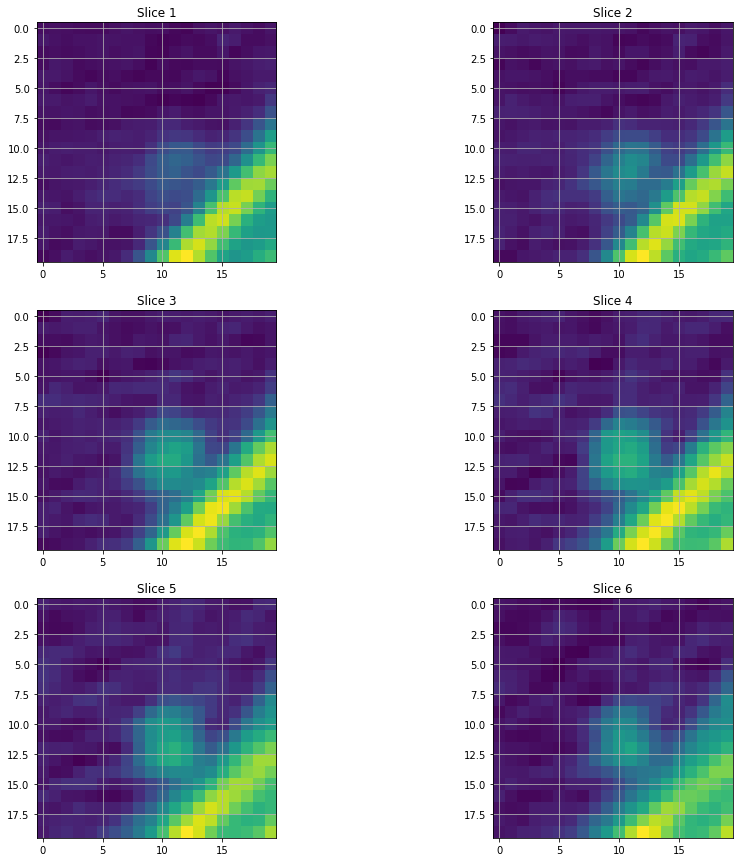

In [3]:
# 2. Subplot of 6 slices

slices = loadImage("MiniLunaDataset3/20046_x0y0z0_20x20x6_r0_1.mhd")

def showSubplot(slices):
    fig, axs = plt.subplots(3,2,figsize=(15,15))
    axs[0,0].imshow(slices[0])
    axs[0,0].set_title('Slice 1')
    #axs[0,0].set_ylabel('HU')
    axs[0,0].grid(True)

    axs[0,1].imshow(slices[1])
    axs[0,1].set_title('Slice 2')
    axs[0,1].grid(True)

    axs[1,0].imshow(slices[2])
    axs[1,0].set_title('Slice 3')
    axs[1,0].grid(True)

    axs[1,1].imshow(slices[3])
    axs[1,1].set_title('Slice 4')
    axs[1,1].grid(True)

    axs[2,0].imshow(slices[4])
    axs[2,0].set_title('Slice 5')
    axs[2,0].grid(True)

    axs[2,1].imshow(slices[5])
    axs[2,1].set_title('Slice 6')
    axs[2,1].grid(True)
    
    return plt.show()

showSubplot(slices)

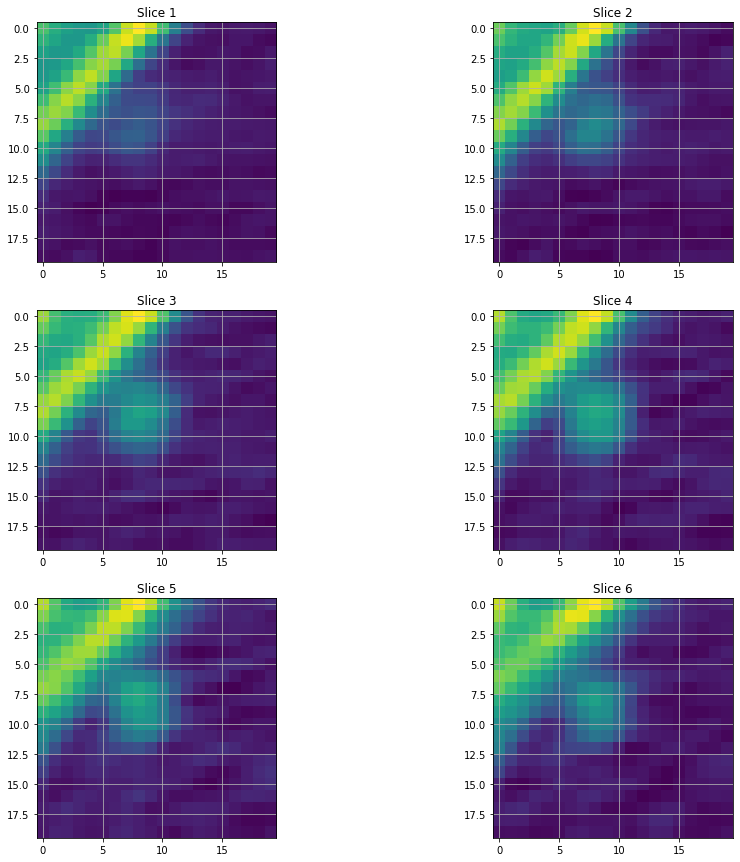

In [4]:
# 3 Augmented samples from same candidate
slices = loadImage("MiniLunaDataset3/20046_x-1y0z0_20x20x6_r180_1.mhd")
showSubplot(slices)

By seeing at the name, we can see the augmentation method was a translation in X axis and rotation by 180°. Also, this can be corroborated by looking at the subplots. We can see how the selected patch indeed rotates 180° and was moved along the X axis. Also, from the file name we can know it is positive because it has a "1" on it, and can be checked by looking at the nodule. Below, there is an example of a negative and can be seen on slice 5 and 6 that it does not have the spherical form we were looking for an actual nodule.

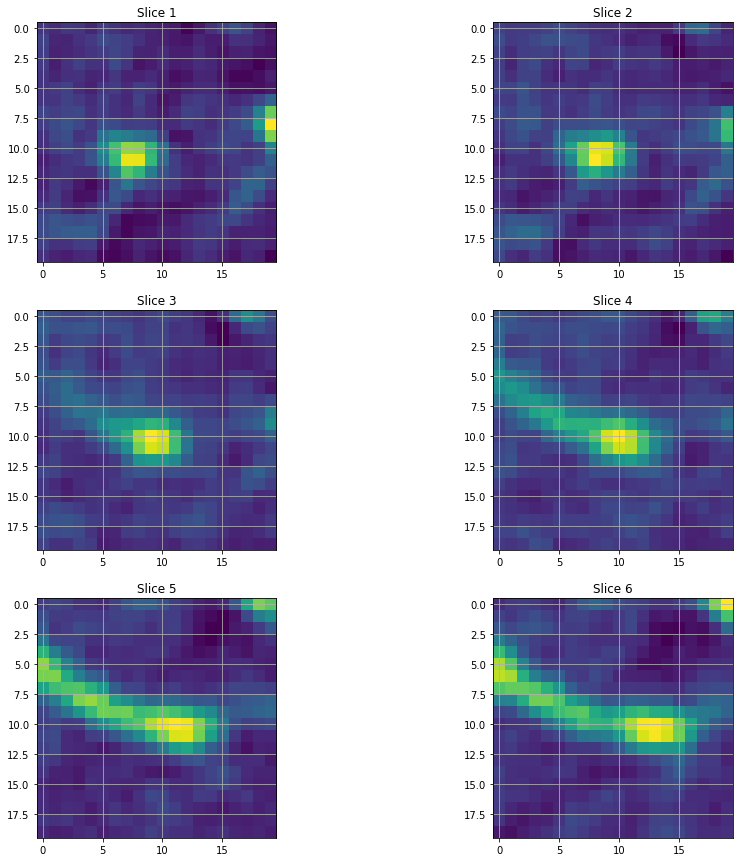

In [5]:
slices = loadImage("MiniLunaDataset3/25536_x0y0z0_20x20x6_r0_0.mhd")
showSubplot(slices)

In [6]:
# 4. Counting files

pos = len(glob.glob("MiniLunaDataset3/*1.mhd"))
neg = len(glob.glob("MiniLunaDataset3/*0.mhd"))
tot = len(glob.glob("MiniLunaDataset3/*.mhd"))

print("Positives = " + str(pos))
print("Negatives = " + str(neg))
print("Total counted = " + str(tot))
print("Sum positives and negatives = " + str(pos+neg))

Positives = 1101
Negatives = 1214
Total counted = 2315
Sum positives and negatives = 2315


### Task 3: Data pre-processing
In order to use neural-networks, we need to pre-process the data and store it in a way which can be easily interpreted by tensorflow.

First of all, separate the test set from the train set. Keep 10% of your samples as a test-set. (**Tip:** Use sklearn **train_test_split** function.)

Since 3D CNNs need a lot of computation power, we will convert our problem to 2D. Instead of using all the 6 CT slices, we will use only the 3rd CT slice. Therefore, from each sample, the 3rd slice wiil be extracted and further preprocessed. In addition, our values currently range from -1024 HU to around 2000 HU. Anything above 400 is not interesting to us, as these are simply bones with different radiodensity. A commonly used set of thresholds to normalize between is -1000 and 400. Finally the labels will be properly encoded to be used for training and testing.

Write your pre-processing tasks as python functions (listed below) and in the end create a pipeline for each sample which will be also implemented as a function.
1. Function loading the .mhd image as a numpy array.
2. Function extracting the 3rd slice of a patch. The final form of patches should be a numpy array of size **20x20** pixels.
3. Function normalizing the dataset.
The unit of measurement in CT scans is the **Hounsfield Unit (HU)**, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia:
<img src="images/HU_CTscannersCalibration.png">

    Create a function which is going to normalize the samples according to this table 
        * Create numpy arrays 
        * Normalize between [-1000, 400] using this normalization method 
    $npzarray = (npzarray - minHU) / (maxHU - minHU)$ <br>
         where minHU = -1000 and maxHU = 400
        * After this normalization set any values bigger than 1 to 1 and any values smaller than 0 to 0. 

4. If statement creating **1-hot** labels as a ground truth data in order to train the neural networks. (One-hot labels: [0,1] --> negative, [1,0]--> positive)
 
5. Store into .npy data binary files. (__Tip:__ Use np.save to store data.)


The pipeline should execute the functions as follows: <br>
Load mhd using sitk -> normalize -> Extract 3rd slice -> Label 

and return:
* data:  [sample_idx,20,20]
* labels: [sample_idx,2]

Data pre-processing should be done for both: train and test set.

In [7]:
# Code for Part 1: Task 3

##### 1. Function loading the .mhd image as a numpy array.

Function: loadImage(filename)

Already exist from Task 1. 

##### 2. Function normalizing the dataset. 

In [8]:
def normalize(dataset):
    norm = np.zeros(dataset.shape)
    minHU = -1000
    maxHU = 400
    # Normalizing
    norm = (dataset - minHU) / (maxHU - minHU) 
    # Setting values bigger than 1 to 1 and any values smaller than 0 to 0.
    norm = np.clip(norm, 0, 1)
    #print(norm)
    return norm

###### 3. Function extracting the 3rd slice of a patch. 

In [9]:
def extract(slices):
    slice3 = slices [2]
    #print(slice3)
    #print(slice3.size)
    #print(slice3.shape)
    #plt.imshow(slice3)
    return slice3

In [10]:
###### 4. Creating 1-hot labels

In [11]:
from sklearn.preprocessing import OneHotEncoder

def label1hot(slices):
    # Setting categories
    X = ['1','0'] 
    enc = OneHotEncoder(categories=[X], sparse=False, handle_unknown='error')
    labels = enc.fit_transform(ground)
    display(enc.categories_)
    display(labels.shape)
    display(labels)
    return labels

In [12]:
###### 5. Splitting test set from train set.

In [13]:
from sklearn.model_selection import train_test_split

def split(data, slices, test_size):
    data_train, data_test, labels_train, labels_test = train_test_split(data, slices, test_size = test_size)
    print(data_train.shape)
    print(data_test.shape)
    print(labels_train.shape)
    print(labels_test.shape)
    return (data_train, data_test, labels_train, labels_test)

### Final pipeline

In [14]:
ground=pd.DataFrame()
data=np.zeros((tot,20,20))

for i,file in enumerate(glob.glob('MiniLunaDataset3/*.mhd'),0):
    ground = ground.append([file[-5:-4]],ignore_index=True) 
    slices = loadImage(file)
    #print(slices)
       
    slices = normalize(slices)
       
    slices = extract(slices)
        
    data[i,:,:]=slices
        
slices = label1hot(slices)
   
data_train, data_test, labels_train, labels_test = split(data, slices, 0.1)

[array(['1', '0'], dtype=object)]

(2315, 2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

(2083, 20, 20)
(232, 20, 20)
(2083, 2)
(232, 2)


#### Storing into .npy data binary files. (Tip: Use np.save to store data.)

In [15]:
np.save("data_train", data_train)
np.save("data_test", data_test)
np.save("labels_train", labels_train)
np.save("labels_test", labels_test)

In case you are not able to complete part 1, you can move to part 2 of the session by loading the provided .npy files. In that case you will **not** get any credits for Part 1.

# Part 2: Model training and validation

### Using TFLearn - A High Level API for Tensorflow

TFLearn introduces a High-Level API that makes neural network building and training fast and easy. This API is intuitive and fully compatible with Tensorflow.

Have a look at the following links for more information about TFLearn: <br>
http://tflearn.org/getting_started/ <p>
http://tflearn.org/tutorials/quickstart.html <p>
http://tflearn.org/models/dnn/ <p>

When you install TensorFlow, you automatically also install <b>Tensorboard</b>. During or after training you can use  it  to visualize the network and its performance. For the next tasks, <b>include both the loss and the accuracy graphs for training and also for evaluating the test-set</b>. A simple way to attach these graphs to jupyter notebook is to use Window's Snipping Tool or a similar application. Then display it either using a plain HTML ```<img src>``` or by using ```IPython.display.Image``` and ```IPython.core.display.HTML```. Don't forget to submit the actual image file with your .ipynb as the image is not saved in the notebook, it is just linked.

### Some Tips:

* Use ```np.load``` to load your data from the previously created .npy binary files.
* Use ```reshape``` method when it is needed to import data to the network.
* Make your own function to create the model for each network architecture to avoid any model conflicts.
* To define a model:
```python
 network = ...(some layers) ...
 
 network = regression(network, optimizer='...', loss='...')
 modelname = DNN(network) 
```
* Use the model's method <b>fit</b> to train your network:
```python
 modelname.fit(X,Y)
```

* Use the model's method <b>save</b> to save your trained model:
```python
 modelname.save('modelname.tflearn')
```


* Use the model's methods <b>load</b> to load a model from a previous python session.
```python
 modelname.load('modelname.tflearn') 
```

* If you trained a model in a past python session, you can load the trained model but first you have to <b>define and initialize it again</b>. 
```python
 network = ...
 
 modelname.DNN(network)    
 modelname.load('modelname.tflearn')
 modelname.predict(X)
```


* Define the directory to store the tensorboard log files by adding it as a parameter when initializing the model.
```python
 tflearn.models.dnn.DNN (network, clip_gradients=5.0, tensorboard_verbose=0, 
 tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)
```
* Use <b>Tensorbaord</b> to visualize network and performance:
Open the command prompt or the anaconda prompt (or a terminal for linux/iOS) and in the working directory type:
``` $ tensorboard --logdir='...' ```
* You may need to add tensorboard's script to your SYSTEM'S PATH to be able to launch it. 
* Use model's method <b>predict</b> to evaluate a test sample. 
```python 
modelname.predict(X) ```

* <b>If you are using the tensorflow 2 it is possible to run tensorboad using the jupyter notebook. </b>
In a jupyter cell type: ``` %tensorboard --logdir logs ```.
For more information look [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)

* If you have strange tflearn errors, restart the python kernel and <b> re-run only the cells concerning your task you currently work (i.e. run the cells concerning only the current tfmodel). Sometimes you cannot load two different tfmodels at the same python session.</b>.

(*) Depending the version of tflearn/tensorflow you are working some commands might differ. Please look online for recent documentation.

### Some Tensorboard examples.
Here are some examples of a training session. After each task, expand accuracy and loss graphs and attach them in the next cell of the notebook like we did in this exmple.

<img src="screenshots_tensorboard/all_graphs.png">
<img src="screenshots_tensorboard/accuracy_graph.png">
<img src="screenshots_tensorboard/loss_graph.png">

### Task 1: Load Data from the numpy binary files (from Part 1)
Use the numpy load function to load the data created in the previous part of the exercise. The data has to be reshaped in a specific way (see code below) in order to be compatible with the tflearn neural network input standard. After the data is successfully loaded, plot any patch and its ground truth as image title to verify that data is correctly represented.

In [16]:
# Code for Part 2: Task 1

# Loading data

data_train = np.load("data_train.npy")
data_test = np.load("data_test.npy")
labels_train = np.load("labels_train.npy")
labels_test = np.load("labels_test.npy")
print(data_train.shape)
print(data_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(2083, 20, 20)
(232, 20, 20)
(2083, 2)
(232, 2)


In [17]:
# Reshaping data

X = data_train.reshape(-1,data_train.shape[1],data_train.shape[2],1)
#print(X)
print(X.shape)
X_val = data_test.reshape(-1,data_test.shape[1],data_test.shape[2],1)
#print(X_val)
print(X_val.shape)

(2083, 20, 20, 1)
(232, 20, 20, 1)


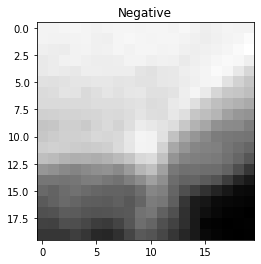

In [18]:
# Plotting a patch and ground truth from image title

def get_prediction_string(prediction):
    return "Positive" if prediction == 0 else "Negative"

def show_single_image(image, title_image = ""):
    plt.title(title_image)
    plt.imshow(image, cmap=plt.cm.Greys_r)
    return plt.show()

chosen = 4 
image = data_train[chosen]
label = labels_train[chosen]
pred = get_prediction_string(np.argmax(label))
show_single_image(image, pred)

### Task 2: Artificial Neural Networks (1 layer)
First, lets train our classifier using an artificial neural network with just one layer, a fully connected one. This layer will have *softmax* as activation function. 

The main advantage of using this activation function is the output range. The range of the outputs will be [0,1] and the sum of all the probabilities will be equal to one. Generally, if the softmax function is used for a  multi-classiication model it returns the probabilities of each class and the target class will have the high probability.

Using TFLearn, define your model. Use these hyperparameters:
* Learning Rate = 1e-4
* Batch Size = 8

Since the network is small, it is not recommended to use Dropout. Train first for 1-2 epochs to verify that everything works and then train for ~10 epochs. Observe the training and evaluate graphs from Tensorboard to decide when to stop training. Copy these graphs to your notebook and explain what happens.

To evaluate the trained model, test it with the test samples and use various performance measures, like <b>confusion matrix</b> for different decision thresholds, <b>precision/recall</b> versus the decision threshold graph and finally plot a **ROC** curve. 

Explain these graphs and the ROC curve. What role does the decision threshold play and why it is so important? Can we have a single value as the decision threshold? Why?

### Tip:
* It is highly recommended to write all the tasks in functions and have as an input argument your tfmodel. Then you will be able to re-use them in the next tasks for different tfmodels.

ANSWER HERE

In [19]:
# Code for Part 2: Task 2

tf.reset_default_graph()

# Build neural network
net = tflearn.input_data(shape=[None,20,20,1])
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net,learning_rate=1e-4)

# Define model
model = tflearn.DNN(net)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

---------
Variables: name (type shape) [size]
---------
FullyConnected/W:0 (float32_ref 400x2) [800, bytes: 3200]
FullyConnected/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 802
Total bytes of variables: 3208


In [20]:
# Clear any logs from previous runs
!rm -rf ./logs/

# Train model
model.fit(X, labels_train, validation_set=(X_val, labels_test), n_epoch=10, batch_size=8, show_metric=True, run_id="model1")
tflearn.models.dnn.DNN (net, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

Training Step: 2609  | total loss: 0.59225 | time: 0.567s
| Adam | epoch: 010 | loss: 0.59225 - acc: 0.6298 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.58333 | time: 1.572s
| Adam | epoch: 010 | loss: 0.58333 - acc: 0.6668 | val_loss: 0.56056 - val_acc: 0.7155 -- iter: 2083/2083
--


In [21]:
# Tensorboard
%load_ext tensorboard

In [22]:
%reload_ext tensorboard
%tensorboard --logdir '/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 10300), started 2 days, 5:18:08 ago. (Use '!kill 10300' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/01_Model1_ss.JPG">

###### Accuracy

<img src="screenshots_wpo4/01_Model1_acc.JPG">

###### Loss

<img src="screenshots_wpo4/01_Model1_loss.JPG">

### Task 3: Test the model
Use **predict** method to test a single test sample. Plot the patch and include in the title its ground truth and the prediction. Now, test all the test samples using a for loop and print the accuracy for a decision threshold of 0.5. Additionally, print the **confusion matrix** for the same decision threshold and comment on your findings. Do you think it's necessary to investigate our system's performance by setting different decision thresholds? What performance measurement should we use?

ANSWER HERE

In [23]:
# Code for Part 2: Task 3

In [24]:
# Evaluating the model to obtain accuracy

score = model.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 71.5517%


In [25]:
# Model prediction

pred = model.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [26]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

Now we can make a prediction of a patch, in order to do this first we get an image from the testing data. After that we make the prediction of the image and compare it with the actual label of the image. As it can be seen the model correctly predicts the patch.

In [27]:
#Patch prediction

image_pred = X_val[sel_sam]
pred_im = model.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Positive'

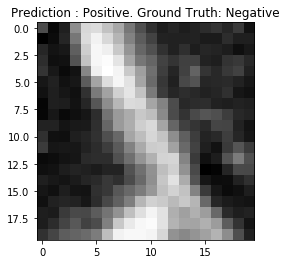

In [28]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [29]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[86 26]
 [40 80]]


In [30]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.7155172413793104


##### Precision and recall

In [31]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


In [32]:
pos_probs = model.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [33]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 75.47


In [34]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 66.67


#### Full metrics report

In [35]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.68      0.77      0.72       112
    positive       0.75      0.67      0.71       120

   micro avg       0.72      0.72      0.72       232
   macro avg       0.72      0.72      0.72       232
weighted avg       0.72      0.72      0.72       232
 samples avg       0.72      0.72      0.72       232



Print the ROC curve and comment.

As we can see from the ROC curve, the classifer is able to discriminate positive and negative labels with high probability. The area below the curve can tell us the probability that our model will correcly discriminate corectly positive and negative samples.

In [36]:
# Code for Part 2: Task 3 - ROC

##### ROC curve

In [37]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc1 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc1)

[0.         0.23214286 1.        ]
[0.         0.66666667 1.        ]
[2 1 0]
0.7172619047619047


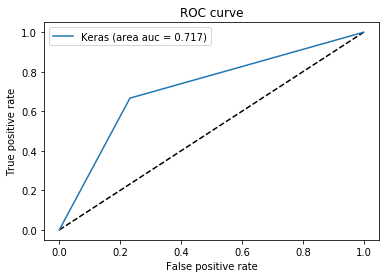

In [39]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

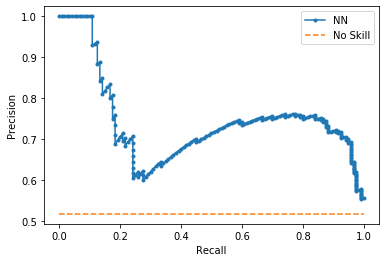

In [40]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 4.1: Artificial Neural Networks (3 layers) - Let's go deep!

Let's try 3 fully-connected layers using **sigmoid** activation function. Choose different values for the learning rate, number of epochs and batch size (e.g. 10, 20, 30...). 

Here is an example network but you are free to choose your own network.
* 1st FC with 80 neurons, sigmoid/relu
* 2nd FC with 40 neurons, sigmoid/relu
* 3rd FC with 2 neurons and softmax
* optimizer: sgd or adam or ...

Explain your network's architecture and **test** your system as you did for the previous simple neural network. What do you observation? Print some graphs which indicate **underfitting** and **overfitting**. 

In [41]:
# Code for Part 2: Task 4.1

tf.reset_default_graph()

# Build neural network
net41 = tflearn.input_data(shape=[None,20,20,1])
net41 = tflearn.fully_connected(net41, 80, activation='sigmoid')
net41 = tflearn.fully_connected(net41, 40, activation='relu')
net41 = tflearn.fully_connected(net41, 2, activation='softmax')
net41 = tflearn.regression(net41, optimizer='adam', learning_rate=1e-4)

# Define model
model41 = tflearn.DNN(net41)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
FullyConnected/W:0 (float32_ref 400x80) [32000, bytes: 128000]
FullyConnected/b:0 (float32_ref 80) [80, bytes: 320]
FullyConnected_1/W:0 (float32_ref 80x40) [3200, bytes: 12800]
FullyConnected_1/b:0 (float32_ref 40) [40, bytes: 160]
FullyConnected_2/W:0 (float32_ref 40x2) [80, bytes: 320]
FullyConnected_2/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 35402
Total bytes of variables: 141608


In [42]:
# Clear any logs from previous runs
!rm -rf ./logs41/ 

# Train model
model41.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model41")
tflearn.models.dnn.DNN (net41, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model41.save('model41_3l.tflearn')

Training Step: 2609  | total loss: 0.41644 | time: 1.608s
| Adam | epoch: 010 | loss: 0.41644 - acc: 0.8039 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.44693 | time: 1.610s
| Adam | epoch: 010 | loss: 0.44693 - acc: 0.7735 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model41_3l.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [43]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:39:26 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/02_Model41_3lay.JPG">

###### Accuracy

<img src="screenshots_wpo4/02_Model41_acc.JPG">

###### Loss

<img src="screenshots_wpo4/02_Model41_loss.JPG">

##### Testing the model

In [44]:
# Evaluating the model to obtain accuracy

score = model41.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 75.4310%


In [45]:
# Model prediction

pred = model41.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [51]:
# Model prediction for one sample

# Selected sample:
sel_sam = 10
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [52]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

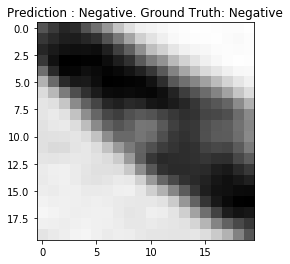

In [53]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [54]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[77 35]
 [22 98]]


In [55]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.7543103448275862


##### Precision and recall

In [56]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


In [57]:
pos_probs = model41.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [58]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 73.68


In [59]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 81.67


#### Full metrics report

In [60]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.78      0.69      0.73       112
    positive       0.74      0.82      0.77       120

   micro avg       0.75      0.75      0.75       232
   macro avg       0.76      0.75      0.75       232
weighted avg       0.76      0.75      0.75       232
 samples avg       0.75      0.75      0.75       232



##### ROC curve

In [61]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc41 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc41)

[0.     0.3125 1.    ]
[0.         0.81666667 1.        ]
[2 1 0]
0.7520833333333333


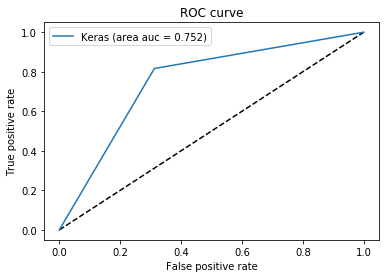

In [62]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc41))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

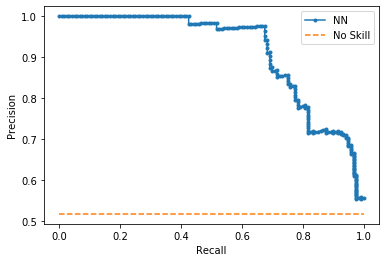

In [63]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 4.2: Relu!
RELU = Rectified Linear Unit

Let's try the same network but using RELU instead of sigmoid now.

In [64]:
# Code for Part 2: Task 4.2

tf.reset_default_graph()

# Build neural network
net42 = tflearn.input_data(shape=[None,20,20,1])
net42 = tflearn.fully_connected(net42, 80, activation='relu')
net42 = tflearn.fully_connected(net42, 40, activation='relu')
net42 = tflearn.fully_connected(net42, 2, activation='softmax')
net42 = tflearn.regression(net42, optimizer='adam', learning_rate=1e-4)

# Define model
model42 = tflearn.DNN(net42)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
FullyConnected/W:0 (float32_ref 400x80) [32000, bytes: 128000]
FullyConnected/b:0 (float32_ref 80) [80, bytes: 320]
FullyConnected_1/W:0 (float32_ref 80x40) [3200, bytes: 12800]
FullyConnected_1/b:0 (float32_ref 40) [40, bytes: 160]
FullyConnected_2/W:0 (float32_ref 40x2) [80, bytes: 320]
FullyConnected_2/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 35402
Total bytes of variables: 141608


In [65]:
# Clear any logs from previous runs
!rm -rf ./logs42/ 

# Train model
model42.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model42")
tflearn.models.dnn.DNN (net42, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model42.save('model42_relu.tflearn')

Training Step: 2609  | total loss: 0.31420 | time: 1.777s
| Adam | epoch: 010 | loss: 0.31420 - acc: 0.8928 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.31466 | time: 1.785s
| Adam | epoch: 010 | loss: 0.31466 - acc: 0.8911 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model42_relu.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [66]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:42:15 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/03_Model42_relu.JPG">

###### Accuracy

<img src="screenshots_wpo4/03_Model42_acc.JPG">

###### Loss

<img src="screenshots_wpo4/03_Model42_loss.JPG">

##### Testing the model

In [67]:
# Evaluating the model to obtain accuracy

score = model42.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 90.9483%


In [68]:
# Model prediction

pred = model42.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [69]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [70]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model42.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

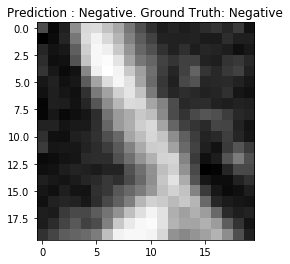

In [71]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [72]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[101  11]
 [ 10 110]]


In [73]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9094827586206896


##### Precision and recall

In [74]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


In [75]:
pos_probs = model42.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [76]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 90.91


In [77]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 91.67


#### Full metrics report

In [78]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.91      0.90      0.91       112
    positive       0.91      0.92      0.91       120

   micro avg       0.91      0.91      0.91       232
   macro avg       0.91      0.91      0.91       232
weighted avg       0.91      0.91      0.91       232
 samples avg       0.91      0.91      0.91       232



##### ROC curve

In [79]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc42 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc42)

[0.         0.09821429 1.        ]
[0.         0.91666667 1.        ]
[2 1 0]
0.9092261904761904


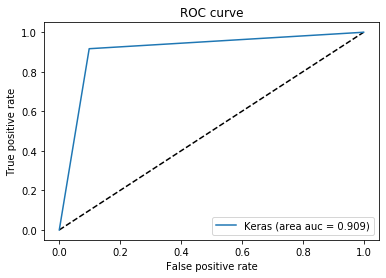

In [81]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc42))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

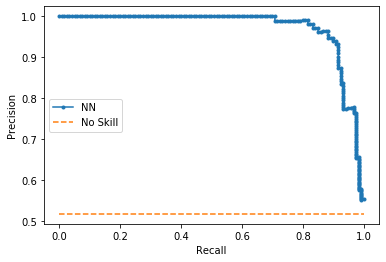

In [82]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 4.3: Dropout!
Use dropout. Some recommended values to investigate are 0.9, 0.5, 0.1. Explain the results.

ANSWER HERE

In [83]:
# Code for Part 2: Task 4.3

tf.reset_default_graph()

# Build neural network
net43 = tflearn.input_data(shape=[None,20,20,1])
net43 = tflearn.fully_connected(net43, 80, activation='relu')
net43 = tflearn.fully_connected(net43, 40, activation='relu')
net43 = tflearn.dropout(net43, 0.9) 
net43 = tflearn.fully_connected(net43, 2, activation='softmax')
net43 = tflearn.regression(net43, optimizer='adam', learning_rate=1e-4)

# Define model
model43 = tflearn.DNN(net43)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
---------
Variables: name (type shape) [size]
---------
FullyConnected/W:0 (float32_ref 400x80) [32000, bytes: 128000]
FullyConnected/b:0 (float32_ref 80) [80, bytes: 320]
FullyConnected_1/W:0 (float32_ref 80x40) [3200, bytes: 12800]
FullyConnected_1/b:0 (float32_ref 40) [40, bytes: 160]
FullyConnected_2/W:0 (float32_ref 40x2) [80, bytes: 320]
FullyConnected_2/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 35402
Total bytes of variables: 141608


In [84]:
# Clear any logs from previous runs
!rm -rf ./logs43/ 

# Train model
model43.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model43")
tflearn.models.dnn.DNN (net43, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model43.save('model43_relu.tflearn')

Training Step: 2609  | total loss: 0.36854 | time: 1.540s
| Adam | epoch: 010 | loss: 0.36854 - acc: 0.8804 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.35168 | time: 1.551s
| Adam | epoch: 010 | loss: 0.35168 - acc: 0.8923 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model43_relu.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [85]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:44:09 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/04_Model43_drop.JPG">

###### Accuracy

<img src="screenshots_wpo4/04_Model43_acc.JPG">

###### Loss

<img src="screenshots_wpo4/04_Model43_loss.JPG">

##### Testing the model

In [86]:
# Evaluating the model to obtain accuracy

score = model43.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 93.1034%


In [87]:
# Model prediction

pred = model43.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [88]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [89]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model43.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

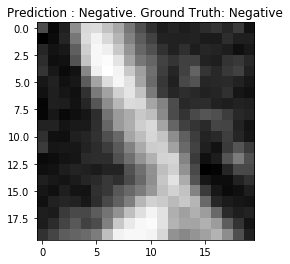

In [90]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [91]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[108   4]
 [ 12 108]]


In [92]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9310344827586207


##### Precision and recall

In [93]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


In [94]:
pos_probs = model43.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [95]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 96.43


In [96]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 90.00


#### Full metrics report

In [97]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.90      0.96      0.93       112
    positive       0.96      0.90      0.93       120

   micro avg       0.93      0.93      0.93       232
   macro avg       0.93      0.93      0.93       232
weighted avg       0.93      0.93      0.93       232
 samples avg       0.93      0.93      0.93       232



##### ROC curve

In [98]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc43 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc43)

[0.         0.03571429 1.        ]
[0.  0.9 1. ]
[2 1 0]
0.9321428571428572


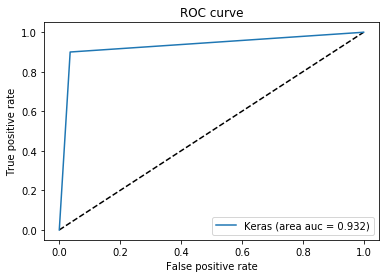

In [99]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc43))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

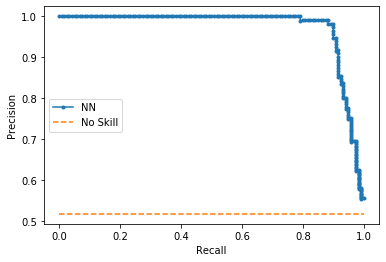

In [100]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [101]:
# Different dropout

tf.reset_default_graph()

# Build neural network
net44 = tflearn.input_data(shape=[None,20,20,1])
net44 = tflearn.fully_connected(net44, 80, activation='relu')
net44 = tflearn.fully_connected(net44, 40, activation='relu')
net44 = tflearn.dropout(net44, 0.5) 
net44 = tflearn.fully_connected(net44, 2, activation='softmax')
net44 = tflearn.regression(net44, optimizer='adam', learning_rate=1e-4)

# Define model
model44 = tflearn.DNN(net44)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
FullyConnected/W:0 (float32_ref 400x80) [32000, bytes: 128000]
FullyConnected/b:0 (float32_ref 80) [80, bytes: 320]
FullyConnected_1/W:0 (float32_ref 80x40) [3200, bytes: 12800]
FullyConnected_1/b:0 (float32_ref 40) [40, bytes: 160]
FullyConnected_2/W:0 (float32_ref 40x2) [80, bytes: 320]
FullyConnected_2/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 35402
Total bytes of variables: 141608


In [102]:
# Clear any logs from previous runs
!rm -rf ./logs44/ 

# Train model
model44.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model44")
tflearn.models.dnn.DNN (net44, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model44.save('model_relu2.tflearn')

Training Step: 2609  | total loss: 0.30064 | time: 2.210s
| Adam | epoch: 010 | loss: 0.30064 - acc: 0.9209 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.33154 | time: 2.213s
| Adam | epoch: 010 | loss: 0.33154 - acc: 0.9038 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model_relu2.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [103]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:45:08 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/05_Model44_difdrop.JPG">

###### Accuracy

<img src="screenshots_wpo4/05_Model44_acc.JPG">

###### Loss

<img src="screenshots_wpo4/05_Model44_loss.JPG">

##### Testing the model

In [104]:
# Evaluating the model to obtain accuracy

score = model44.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 87.5000%


In [105]:
# Model prediction

pred = model44.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [106]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [107]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model44.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Positive'

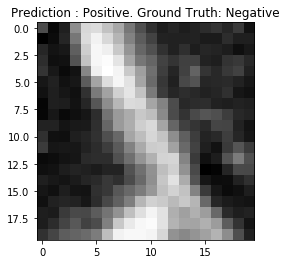

In [108]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [109]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[106   6]
 [ 23  97]]


In [110]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.875


##### Precision and recall

In [111]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


In [112]:
pos_probs = model44.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [113]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 94.17


In [114]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 80.83


#### Full metrics report

In [115]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.82      0.95      0.88       112
    positive       0.94      0.81      0.87       120

   micro avg       0.88      0.88      0.88       232
   macro avg       0.88      0.88      0.87       232
weighted avg       0.88      0.88      0.87       232
 samples avg       0.88      0.88      0.88       232



##### ROC curve

In [116]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc44 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc44)

[0.         0.05357143 1.        ]
[0.         0.80833333 1.        ]
[2 1 0]
0.8773809523809524


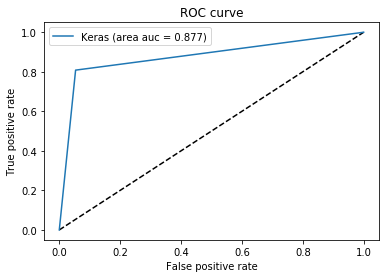

In [117]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc44))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

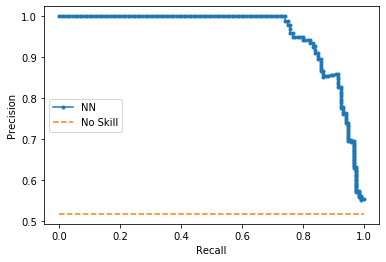

In [118]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 5. A Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 3x3, number of channels = 64, activation function = sigmoid
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 50 neurons, activation function = sigmoid
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [119]:
# Code for Part 2: Task 5

tf.reset_default_graph()

# Build neural network
net5 = tflearn.input_data(shape=[None,20,20,1])
net5 = tflearn.conv_2d(net5, 64, 3, activation='sigmoid')
net5 = tflearn.max_pool_2d(net5, 2)
net5 = tflearn.conv_2d(net5, 64, 3, activation='sigmoid')
net5 = tflearn.fully_connected(net5, 50, activation='sigmoid')
net5 = tflearn.dropout(net5, 0.5)
net5 = tflearn.fully_connected(net5, 2, activation='softmax')
net5 = tflearn.regression(net5, optimizer='adam', learning_rate=1e-4, loss='categorical_crossentropy')

# Define model
model5 = tflearn.DNN(net5)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

---------
Variables: name (type shape) [size]
---------
Conv2D/W:0 (float32_ref 3x3x1x64) [576, bytes: 2304]
Conv2D/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_1/W:0 (float32_ref 3x3x64x64) [36864, bytes: 147456]
Conv2D_1/b:0 (float32_ref 64) [64, bytes: 256]
FullyConnected/W:0 (float32_ref 6400x50) [320000, bytes: 1280000]
FullyConnected/b:0 (float32_ref 50) [50, bytes: 200]
FullyConnected_1/W:0 (float32_ref 50x2) [100, bytes: 400]
FullyConnected_1/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 357720
Total bytes of variables: 1430880


In [120]:
# Clear any logs from previous runs
!rm -rf ./logs5/ 

# Train model
model5.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model5")
tflearn.models.dnn.DNN (net5, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model5.save('model5_conv_sup.tflearn')

Training Step: 2609  | total loss: 0.40703 | time: 4.037s
| Adam | epoch: 010 | loss: 0.40703 - acc: 0.8190 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.40364 | time: 4.048s
| Adam | epoch: 010 | loss: 0.40364 - acc: 0.8121 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model5_conv_sup.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [121]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:46:20 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/06_Model5_conv1.JPG">

###### Accuracy

<img src="screenshots_wpo4/06_Model5_acc.JPG">

###### Loss

<img src="screenshots_wpo4/06_Model5_loss.JPG">

In [122]:
# Evaluating the model to obtain accuracy

score = model5.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 80.1724%


In [123]:
# Model prediction

pred = model5.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [137]:
# Model prediction for one sample

# Selected sample:
sel_sam = 3
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [138]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model5.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

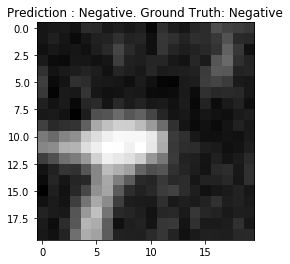

In [139]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [140]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[93 19]
 [27 93]]


In [141]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.8017241379310345


##### Precision and recall

In [142]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.76


In [143]:
pos_probs = model5.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [144]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 83.04


In [145]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 77.50


#### Full metrics report

In [146]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.78      0.83      0.80       112
    positive       0.83      0.78      0.80       120

   micro avg       0.80      0.80      0.80       232
   macro avg       0.80      0.80      0.80       232
weighted avg       0.80      0.80      0.80       232
 samples avg       0.80      0.80      0.80       232



##### ROC curve

In [147]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc5 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc5)

[0.         0.16964286 1.        ]
[0.    0.775 1.   ]
[2 1 0]
0.8026785714285714


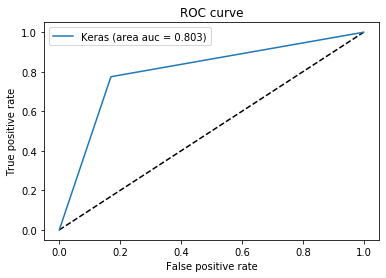

In [148]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

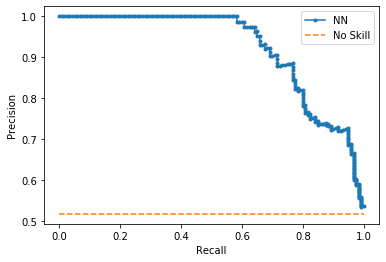

In [149]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 6. A Deeper Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> conv3 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 5x5, number of channels = 64, activation function = relu
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 100 neurons, activation function = relu
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

In [150]:
# Code for Part 2: Task 6

tf.reset_default_graph()

# Build neural network
net6 = tflearn.input_data(shape=[None,20,20,1])
net6 = tflearn.conv_2d(net6, 64, 5, activation='relu')
net6 = tflearn.max_pool_2d(net6, 2)
net6 = tflearn.conv_2d(net6, 64, 5, activation='relu')
net6 = tflearn.conv_2d(net6, 64, 5, activation='relu')
net6 = tflearn.fully_connected(net6, 100, activation='relu')
net6 = tflearn.dropout(net6, 0.5)
net6 = tflearn.fully_connected(net6, 2, activation='softmax')
net6 = tflearn.regression(net6, optimizer='adam', learning_rate=1e-4, loss='categorical_crossentropy')

# Define model
model6 = tflearn.DNN(net6)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
Conv2D/W:0 (float32_ref 5x5x1x64) [1600, bytes: 6400]
Conv2D/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_1/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_1/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_2/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_2/b:0 (float32_ref 64) [64, bytes: 256]
FullyConnected/W:0 (float32_ref 6400x100) [640000, bytes: 2560000]
FullyConnected/b:0 (float32_ref 100) [100, bytes: 400]
FullyConnected_1/W:0 (float32_ref 100x2) [200, bytes: 800]
FullyConnected_1/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 846894
Total bytes of variables: 3387576


In [151]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Train model
model6.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model6")
tflearn.models.dnn.DNN (net6, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model6.save('model6_conv_deep.tflearn')

Training Step: 2609  | total loss: 0.07784 | time: 5.002s
| Adam | epoch: 010 | loss: 0.07784 - acc: 0.9801 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.07184 | time: 5.021s
| Adam | epoch: 010 | loss: 0.07184 - acc: 0.9821 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model6_conv_deep.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [152]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:48:24 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/07_Model6_conv2.JPG">

###### Accuracy

<img src="screenshots_wpo4/07_Model6_acc.JPG">

###### Loss

<img src="screenshots_wpo4/07_Model6_loss.JPG">

In [153]:
# Evaluating the model to obtain accuracy

score = model6.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 96.9828%


In [154]:
# Model prediction

pred = model6.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [155]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [156]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model6.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

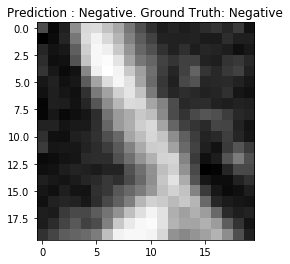

In [157]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [158]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[110   2]
 [  5 115]]


In [159]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9698275862068966


##### Precision and recall

In [160]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


In [161]:
pos_probs = model6.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [162]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 98.29


In [163]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 95.83


#### Full metrics report

In [164]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.96      0.98      0.97       112
    positive       0.98      0.96      0.97       120

   micro avg       0.97      0.97      0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232
 samples avg       0.97      0.97      0.97       232



##### ROC curve

In [165]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc6 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc6)

[0.         0.01785714 1.        ]
[0.         0.95833333 1.        ]
[2 1 0]
0.9702380952380953


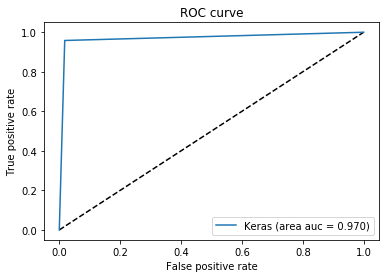

In [166]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc6))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

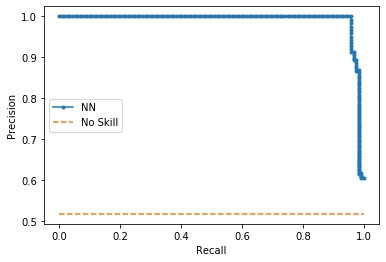

In [167]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Task 7


Comment the network differences between the two convolutional neural networks. Which ones do you think have the strongest impact in the network's perfomance? Justify your answer. 

An implementation of one or more networks might be necessary to answer this question.

In [176]:

# Code for Part 2: Task 7

###### New Model definition

input -> conv1 -> pool1 -> conv2 -> pool2 -> conv3 -> conv4 -> fc1 -> fc2 -> softmax

In [177]:
tf.reset_default_graph()

# Build neural network
net7 = tflearn.input_data(shape=[None,20,20,1])
net7 = tflearn.conv_2d(net7, 64, 5, activation='relu')
net7 = tflearn.max_pool_2d(net7, 2)
net7 = tflearn.conv_2d(net7, 64, 5, activation='relu')
net7 = tflearn.max_pool_2d(net7, 2)
net7 = tflearn.conv_2d(net7, 64, 5, activation='relu')
net7 = tflearn.conv_2d(net7, 64, 5, activation='relu')
net7 = tflearn.fully_connected(net7, 100, activation='relu')
net7 = tflearn.dropout(net7, 0.5)
net7 = tflearn.fully_connected(net7, 2, activation='softmax')
net7 = tflearn.regression(net7, optimizer='adam', learning_rate=1e-4, loss='categorical_crossentropy')

# Define model
model7 = tflearn.DNN(net7)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
Conv2D/W:0 (float32_ref 5x5x1x64) [1600, bytes: 6400]
Conv2D/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_1/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_1/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_2/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_2/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_3/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_3/b:0 (float32_ref 64) [64, bytes: 256]
FullyConnected/W:0 (float32_ref 1600x100) [160000, bytes: 640000]
FullyConnected/b:0 (float32_ref 100) [100, bytes: 400]
FullyConnected_1/W:0 (float32_ref 100x2) [200, bytes: 800]
FullyConnected_1/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 469358
Total bytes of variables: 1877432


In [178]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Train model
model7.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model7")
tflearn.models.dnn.DNN (net7, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model7.save('model7_conv_deep.tflearn')

Training Step: 2609  | total loss: 0.14661 | time: 4.587s
| Adam | epoch: 010 | loss: 0.14661 - acc: 0.9544 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.13881 | time: 4.604s
| Adam | epoch: 010 | loss: 0.13881 - acc: 0.9590 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model7_conv_deep.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [179]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:54:58 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/08_Model7_conv3.JPG">

###### Accuracy

<img src="screenshots_wpo4/08_Model7_acc.JPG">

###### Loss

<img src="screenshots_wpo4/08_Model7_loss.JPG">

We can see from convolutional networks above that if is deeper it has better accuracy, nevertheless we have seen accuracy is not the only important paramter to take into account.

In [180]:
# Evaluating the model to obtain accuracy

score = model7.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 97.4138%


In [181]:
# Model prediction

pred = model7.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [182]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [184]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model7.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

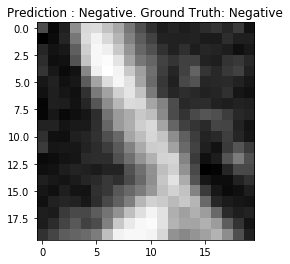

In [157]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [185]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[111   1]
 [  5 115]]


In [186]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9741379310344828


##### Precision and recall

In [187]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.97


In [188]:
pos_probs = model7.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [189]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 99.14


In [190]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 95.83


#### Full metrics report

In [191]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.97       112
    positive       0.99      0.96      0.97       120

   micro avg       0.97      0.97      0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232
 samples avg       0.97      0.97      0.97       232



##### ROC curve

In [192]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc7 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc7)

[0.         0.00892857 1.        ]
[0.         0.95833333 1.        ]
[2 1 0]
0.974702380952381


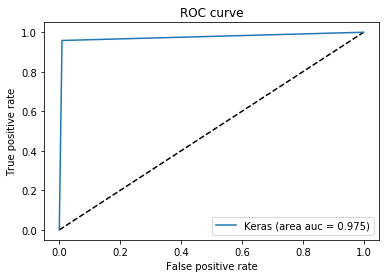

In [193]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc7))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

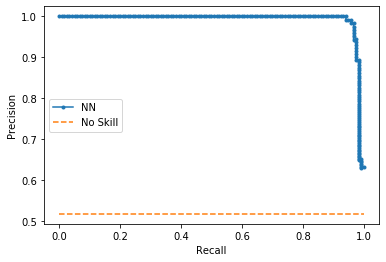

In [194]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### (BONUS) Create your own convolution neural network

Create your own network and try to increase model's accuracy. You can use different:
* size of convolutional kernels
* activation functions
* optimizers ...
***

* **Extra task**: Select a different part of the dataset as test-set and repeat the training tasks

In [195]:
# Code for BONUS part

#### New Model definition

###### For trying to have better accuracy we added another convolutional layer and a fully connected

input -> conv1 -> pool1 -> conv2 -> pool2 -> conv3 ->  pool3 -> conv4 -> pool4 -> conv5 -> fc1 -> fc2 ->softmax

In [196]:
tf.reset_default_graph()

# Build neural network
net8 = tflearn.input_data(shape=[None,20,20,1])
net8 = tflearn.conv_2d(net8, 64, 5, activation='relu')
net8 = tflearn.max_pool_2d(net8, 2)
net8 = tflearn.conv_2d(net8, 64, 5, activation='relu')
net8 = tflearn.max_pool_2d(net8, 2)
net8 = tflearn.conv_2d(net8, 64, 5, activation='relu')
net8 = tflearn.max_pool_2d(net8, 2)
net8 = tflearn.conv_2d(net8, 64, 5, activation='relu')
net8 = tflearn.max_pool_2d(net8, 2)
net8 = tflearn.conv_2d(net8, 64, 5, activation='relu')
net8 = tflearn.fully_connected(net8, 100, activation='relu')
net8 = tflearn.fully_connected(net8, 2, activation='softmax')
net8 = tflearn.regression(net8, optimizer='adam', learning_rate=1e-4, loss='categorical_crossentropy')

# Define model
model8 = tflearn.DNN(net8)

# Model summary
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
Conv2D/W:0 (float32_ref 5x5x1x64) [1600, bytes: 6400]
Conv2D/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_1/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_1/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_2/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_2/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_3/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_3/b:0 (float32_ref 64) [64, bytes: 256]
Conv2D_4/W:0 (float32_ref 5x5x64x64) [102400, bytes: 409600]
Conv2D_4/b:0 (float32_ref 64) [64, bytes: 256]
FullyConnected/W:0 (float32_ref 256x100) [25600, bytes: 102400]
FullyConnected/b:0 (float32_ref 100) [100, bytes: 400]
FullyConnected_1/W:0 (float32_ref 100x2) [200, bytes: 800]
FullyConnected_1/b:0 (float32_ref 2) [2, bytes: 8]
Total size of variables: 437422
Total bytes of variables: 1749688


In [197]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Train model
model8.fit(X, labels_train, n_epoch=10, batch_size=8, show_metric=True, run_id="model8")
tflearn.models.dnn.DNN (net8, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)

model8.save('model9_conv_deep.tflearn')

Training Step: 2609  | total loss: 0.07511 | time: 6.050s
| Adam | epoch: 010 | loss: 0.07511 - acc: 0.9723 -- iter: 2080/2083
Training Step: 2610  | total loss: 0.06936 | time: 6.073s
| Adam | epoch: 010 | loss: 0.06936 - acc: 0.9751 -- iter: 2083/2083
--
INFO:tensorflow:C:\Users\ferba\Documents\Jupyter_notebook\WPO4\WPO4\model9_conv_deep.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [175]:
%reload_ext tensorboard
%tensorboard --logdir='/tmp/tflearn_logs/'

Reusing TensorBoard on port 6006 (pid 21396), started 3 days, 18:52:29 ago. (Use '!kill 21396' to kill it.)

##### Graphs

###### General view

<img src="screenshots_wpo4/09_Model9_per.JPG">

###### Accuracy

<img src="screenshots_wpo4/09_Model9_acc.JPG">

###### Loss

<img src="screenshots_wpo4/09_Model9_loss.JPG">

In [198]:
# Evaluating the model to obtain accuracy

score = model8.evaluate(X_val, labels_test)

print('Test accuracy: %0.4f%%' % (score[0] * 100))

Test accuracy: 96.5517%


In [199]:
# Model prediction

pred = model8.predict(X_val)
pred = (pred > 0.5)
# print(pred)

In [200]:
# Model prediction for one sample

# Selected sample:
sel_sam = 2
label = get_prediction_string(labels_test[sel_sam].argmax())
label

'Negative'

In [202]:
# Patch prediction

image_pred = X_val[sel_sam]
pred_im = model8.predict(np.array([image_pred]))
pred_im = (pred_im > 0.5)

prediction = get_prediction_string(pred_im.argmax())
prediction

'Negative'

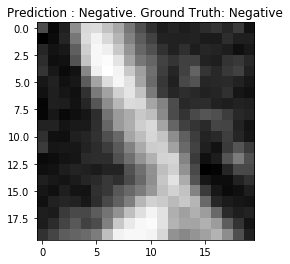

In [203]:
show_single_image(image_pred.reshape(20,20), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

We can obtain certain metrics to evaluate how good our model is.

##### Confusion Matrix

In [204]:
labels_test_array = np.array(labels_test)

cm = confusion_matrix(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[106   6]
 [  2 118]]


In [205]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9655172413793104


##### Precision and recall

In [206]:
average_precision = average_precision_score(labels_test_array.argmax(axis=1), pred.argmax(axis=1))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.94


In [207]:
pos_probs = model8.predict(X_val)
pos_probs = pos_probs[:,1]

# print(pos_probs.shape)
# print(labels_test.argmax(axis=1).shape)

precision, recall, thresholds = precision_recall_curve(labels_test.argmax(axis=1), pos_probs)

# print(precision)
# print(recall)
# print(thresholds)

In [208]:
precisionman = tp*100/(tp+fp)
print('Positive precision: {0:0.2f}'.format(
      precisionman))

Positive precision: 95.16


In [209]:
recallman = tp*100/(tp+fn)
print('Positive recall: {0:0.2f}'.format(
      recallman))

Positive recall: 98.33


#### Full metrics report

In [210]:
print(classification_report(labels_test_array, pred,  target_names = ["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.98      0.95      0.96       112
    positive       0.95      0.98      0.97       120

   micro avg       0.97      0.97      0.97       232
   macro avg       0.97      0.96      0.97       232
weighted avg       0.97      0.97      0.97       232
 samples avg       0.97      0.97      0.97       232



##### ROC curve

In [211]:
fpr, tpr, thresholds = roc_curve(labels_test_array.argmax(axis=1), pred.argmax(axis=1))
auc8 = auc(fpr, tpr)
print(fpr)
print(tpr)
print(thresholds)
print(auc8)

[0.         0.05357143 1.        ]
[0.         0.98333333 1.        ]
[2 1 0]
0.9648809523809524


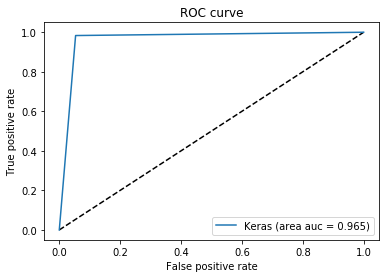

In [212]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc8))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Precision-recall curve

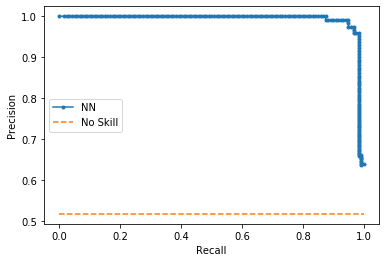

In [213]:
no_skill = len(labels_test_array[labels_test_array.argmax(axis=1)==1]) / len(labels_test_array)
plt.plot(recall, precision, marker='.', label='NN')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

<img src="screenshots_wpo4/pumas.png" width="100">